# Hashing

- we can make improvements in our search algorithms by taking advantage of information about where items are stored in the collection with respect to one another. 

- For example, by knowing that a list was ordered, we could search in logarithmic time using a binary search. 

- we will attempt to go one step further by building a data structure that can be searched in O(1) time. 

- This concept is referred to as hashing.

A hash table is a collection of items which are stored in such a way as to make it easy to find them later. Each position of the hash table, often called a slot, can hold an item and is named by an integer value starting at 0. For example, we will have a slot named 0, a slot named 1, a slot named 2, and so on. Initially, the hash table contains no items so every slot is empty. 


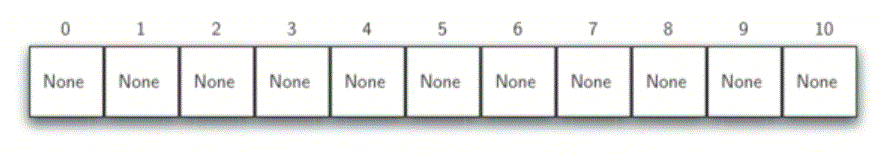

The mapping between an item and the slot where that item belongs in the hash table is called the hash function. The hash function will take any item in the collection and return an integer in the range of slot names, between 0 and m-1. Assume that we have the set of integer items 54, 26, 93, 17, 77, and 31. Our first hash function, sometimes referred to as the “remainder method,” simply takes an item and divides it by the table size, returning the remainder as its hash value (h(item)=item%11).

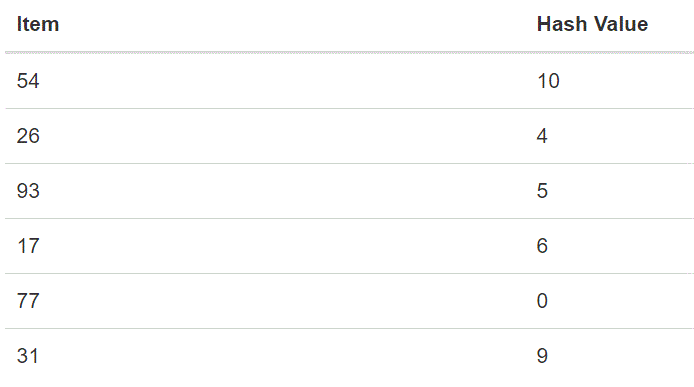

Once the hash values have been computed, we can insert each item into the hash table at the designated position

Note that 6 of the 11 slots are now occupied. 

This is referred to as the __load factor__, and is commonly denoted by λ=$\frac{numberofitems}{tablesize}$. For this example, λ=$\frac{6}{11}$

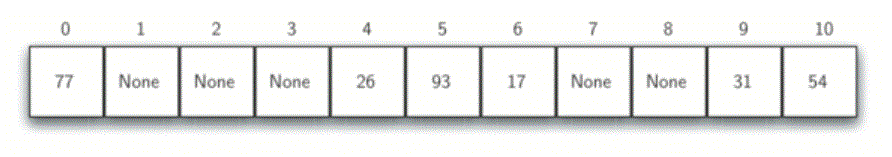

Now when we want to search for an item, we simply use the hash function to compute the slot name for the item and then check the hash table to see if it is present. 

This searching operation is O(1), since a constant amount of time is required to compute the hash value and then index the hash table at that location. If everything is where it should be, we have found a constant time search algorithm.

You can probably already see that this technique is going to work only if each item maps to a unique location in the hash table. 

For example, if the item 44 had been the next item in our collection, it would have a hash value of 0 (44%11==0). Since 77 also had a hash value of 0, we would have a problem. 

According to the hash function, two or more items would need to be in the same slot. This is referred to as a collision (it may also be called a “clash”). Clearly, collisions create a problem for the hashing technique. 

Given a collection of items, a hash function that maps each item into a unique slot is referred to as a perfect hash function. 

If we know the items and the collection will never change, then it is possible to construct a perfect hash function. Unfortunately, given an arbitrary collection of items, there is no systematic way to construct a perfect hash function.

> Luckily, we do not need the hash function to be perfect to still gain performance efficiency.

One way to always have a perfect hash function is to increase the size of the hash table so that each possible value in the item range can be accommodated. 

This guarantees that each item will have a unique slot. 

Although this is practical for small numbers of items, it is not feasible when the number of possible items is large. 

For example, if the items were nine-digit Social Security numbers, this method would require almost one billion slots. If we only want to store data for a class of 25 students, we will be wasting an enormous amount of memory.

__ minimize the number of collisions__, 
There are a number of common ways to extend the simple remainder method. We will consider a few of them here.

- The __folding method__ for constructing hash functions 
    - begins by dividing the item into equal-size pieces (the last piece may not be of equal size). 
    - These pieces are then added together to give the resulting hash value. 
    - For example, if our item was the phone number 436-555-4601, we would take the digits and divide them into groups of 2 (43,65,55,46,01). 
    - After the addition, 43+65+55+46+01, we get 210. 
    - If we assume our hash table has 11 slots, then we need to perform the extra step of dividing by 11 and keeping the remainder. 
    - In this case 210 % 11 is 1, so the phone number 436-555-4601 hashes to slot 1. 
    - Some folding methods go one step further and reverse every other piece before the addition. For the above example, we get 43+56+55+64+01=219 which gives 219 % 11=10.
    
- __mid-square method__. 
    - We first square the item, and then extract some portion of the resulting digits. 
    - For example, if the item were 44, we would first compute $44^2 = 1936$. 
    - By extracting the middle two digits, 93, and performing the remainder step, we get 5 (93 % 11).   
    
### Collision Resolution

When two items hash to the same slot, we must have a systematic method for placing the second item in the hash table. This process is called collision resolution.

set of integer items under the simple remainder method hash function (54,26,93,17,77,31,44,55,20). 

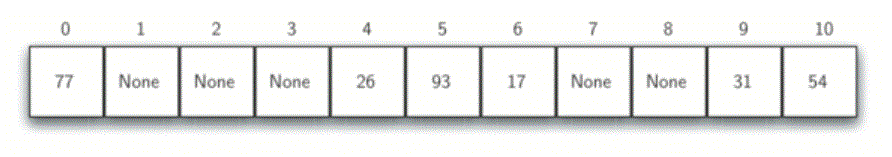

When we attempt to place 44 into slot 0, a collision occurs. Under __linear probing__, we look sequentially, slot by slot, until we find an open position. In this case, we find slot 1.

Again, 55 should go in slot 0 but must be placed in slot 2 since it is the next open position. The final value of 20 hashes to slot 9. Since slot 9 is full, we begin to do __linear probing__. We visit slots 10, 0, 1, and 2, and finally find an empty slot at position 3.

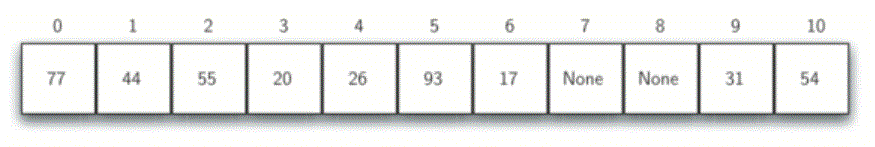

it is essential that we utilize the __same methods to search__ for items. 

Assume we want to look up the item 93. 

When we compute the hash value, we get 5. 

Looking in slot 5 reveals 93, and we can return True. 

What if we are looking for 20? Now the hash value is 9, and slot 9 is currently holding 31. 

We cannot simply return False since we know that there could have been collisions. 

We are now forced to do a sequential search, starting at position 10, looking until 
    - either we find the item 20 or 
    - we find an empty slot.
    
A __disadvantage__ to linear probing is the __tendency for clustering__; 
    - items become clustered in the table. 
    - This means that if many collisions occur at the same hash value, a number of surrounding slots will be filled by the linear probing resolution. 
    - This will have an impact on other items that are being inserted
    
 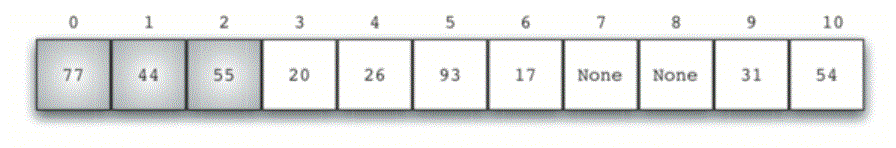
 
One way to deal with __clustering__ is to extend the linear probing technique so that instead of looking sequentially for the next open slot, we __skip slots__, thereby more evenly distributing the items that have caused collisions. 

This will potentially reduce the clustering that occurs. 

Figure below shows the items when collision resolution is done with a “plus 3” probe. 

This means that once a collision occurs, we will look at every 3rd slot until we find one that is empty.

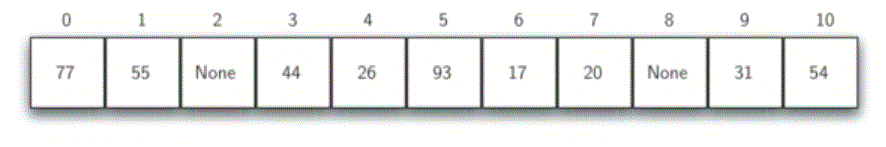

The general name for this process of looking for another slot after a collision is __rehashing__.

- With __simple linear probing__, 
    - the rehash function is newhashvalue = rehash(oldhashvalue) 
        where rehash(pos) = (pos+1) % sizeoftable. 
- The “plus 3” rehash can be defined as 
    - rehash(pos) = (pos+3) % sizeoftable. 
    
- In general, rehash(pos) = (pos+skip) % sizeoftable. 

It is important to note that the size of the “skip” must be such that all the slots in the table will eventually be visited. Otherwise, part of the table will be unused. 

To ensure this, it is often suggested that the table size be a prime number. This is the reason we have been using 11 in our examples.

A variation of the linear probing idea is called __quadratic probing__. 

- Instead of using a constant “skip” value, we use a rehash function that increments the hash value by 1, 3, 5, 7, 9, and so on. 

- This means that if the first hash value is h, the successive values are h+1, h+4, h+9, h+16, and so on. 

- In other words, quadratic probing uses a skip consisting of successive perfect squares. 

An alternative method for handling the collision problem is to allow each slot to hold a reference to a collection (or chain) of items. __Chaining__ allows many items to exist at the same location in the hash table. 

When collisions happen, the item is still placed in the proper slot of the hash table. As more and more items hash to the same location, the difficulty of searching for the item in the collection increases.

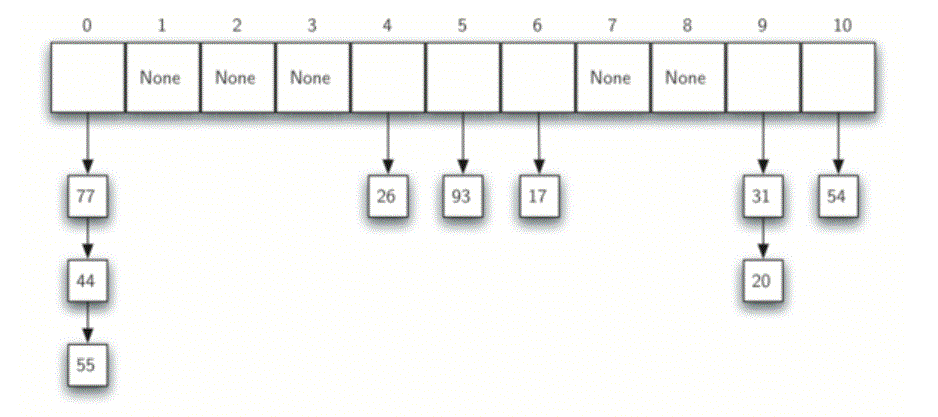

When we want to search for an item, we use the hash function to generate the slot where it should reside. Since each slot holds a collection, we use a searching technique to decide whether the item is present. The advantage is that on the average there are likely to be many fewer items in each slot, so the search is perhaps more efficient. We will look at the analysis for hashing at the end of this section.


__Qs 1__: In a hash table of size 13 which index positions would the following two keys map to? 27, 130
    (A) 1, 10
    (B) 13, 0
    (C) 1, 0
    (D) 2, 3
    
Ans C : Correct! 27 % 13 == 1 and 130 % 13 == 0

__Qs-2__: Suppose you are given the following set of keys to insert into a hash table that holds exactly 11 values: 113 , 117 , 97 , 100 , 114 , 108 , 116 , 105 , 99 Which of the following best demonstrates the contents of the has table after all the keys have been inserted using linear probing?
    (A) 100, __, __, 113, 114, 105, 116, 117, 97, 108, 99
    (B) 99, 100, __, 113, 114, __, 116, 117, 105, 97, 108
    (C) 100, 113, 117, 97, 14, 108, 116, 105, 99, __, __
    (D) 117, 114, 108, 116, 105, 99, __, __, 97, 100, 113

Ans B, Correct! Using modulo 11 arithmetic and linear probing gives these values

# Implementing the 'Map' - Abstract Data Type

One of the most useful Python collections is the __dictionary__. 

Recall that a dictionary is an associative data type where you can store key–data pairs. The key is used to look up the associated data value. We often refer to this idea as a map. 

The __map abstract data type__ is defined as follows. 

    - The structure is an unordered collection of associations between a key and a data value. 
    - The keys in a map are all unique so that there is a one-to-one relationship between a key and a value. The operations are given below.

    - Map() Create a new, empty map. It returns an empty map collection.
    - put(key,val) Add a new key-value pair to the map. If the key is already in the map then replace the old value with the new value.
    - get(key) Given a key, return the value stored in the map or None otherwise.
    - del Delete the key-value pair from the map using a statement of the form del map[key].
    - len() Return the number of key-value pairs stored in the map.
    - in Return True for a statement of the form key in map, if the given key is in the map, False otherwise.

One of the great benefits of a dictionary is the fact that given a key, we can look up the associated data value very quickly. 

In order to provide this fast look up capability, we need an implementation that supports an efficient search. 

We could use a list with sequential or binary search but it would be even better to use a __hash table__ , since looking up an item in a hash table can approach O(1) performance.

we use 2 lists to create a HashTable class that implements the __Map abstract data type__. 

- One list, called slots, will hold the key items 
- and a parallel list, called data, will hold the data values. 

When we look up a key, the corresponding position in the data list will hold the associated data value. 

We will treat the key list as a hash table using the ideas presented earlier. Note that the initial size for the hash table has been chosen to be 11. 

_Although this is arbitrary, it is important that the size be a prime number so that the collision resolution algorithm can be as efficient as possible._

In [73]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data  = [None] * self.size
        
    def put(self, key, data):
        hashvalue = self.hashfunction(key, len(self.slots))

        if  self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue]  = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue, len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot, len(self.slots))

                if self.slots[nextslot]  == None:
                    self.slots[nextslot]=key
                    self.data[nextslot] =data
                else:
                    self.data[nextslot] = data #replace

    def get(self, key):
        startslot = self.hashfunction(key,len(self.slots))

        data     = None
        stop     = False
        found    = False
        position = startslot

        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:
                    stop = True

        return data

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

    def hashfunction(self, key, size):
         return key%size

    def rehash(self, oldhash, size):
        return (oldhash+1)%size

- __hashfunction__ implements the simple remainder method. 

- The __collision resolution__ technique is linear probing with a “plus 1” rehash function. 

- The __put__ function assumes that there will eventually be an empty slot unless the key is already present in the self.slots. 
    - It computes the original hash value and if that slot is not empty, iterates the rehash function until an empty slot occurs. 
    - If a nonempty slot already contains the key, the old data value is replaced with the new data value. 

Likewise, the __get__ function begins by computing the initial hash value. 

    - If the value is not in the initial slot, rehash is used to locate the next possible position. 
    - Notice that line 15 guarantees that the search will terminate by checking to make sure that we have not returned to the initial slot. If that happens, we have exhausted all possible slots and the item must not be present.

The final methods of the __HashTable class__ provide additional dictionary functionality. 

We overload the __getitem__ and __setitem__ methods to allow access using ``[]``. 

This means that once a HashTable has been created, the familiar index operator will be available. 

In [74]:
# initialize the has table
H = HashTable()

In [79]:
print('size of hash table = ', H.size)
print('slots = ', H.slots)
print('data  = ', H.data)


size of hash table =  11
slots =  [32, None, None, None, None, None, None, None, None, None, 54]
data  =  ['dog', None, None, None, None, None, None, None, None, None, 'catt']


In [76]:
H[54]="cat"

In [77]:
H[54]="catt"

In [78]:
H[32]="dog"

In [80]:
H[54]="cat"
H[26]="dog"
H[93]="lion"
H[17]="tiger"
H[77]="bird"
H[31]="cow"
H[44]="goat"
H[55]="pig"
H[20]="chicken"

here2
here2
here2
here2
here2
here2
here2
here2
here2
here2
here2


In [ ]:
# Next we will access and modify some items in the hash table. 
# Note that the value for the key 20 is being replaced.
H[20]

In [ ]:
H[17]

In [ ]:
H[20]='duck'
H[20]

In [ ]:
H.data

print(H[99])

# Analysis of Hashing

- the best case hashing would provide a O(1), constant time search technique. However, due to collisions, the number of comparisons is typically not so simple.

the __load factor__, and is commonly denoted by λ=$\frac{numberofitems}{tablesize}$.

    - if λ is small, then there is a lower chance of collisions, meaning that items are more likely to be in the slots where they belong. 
    - If λ is large, meaning that the table is filling up, then there are more and more collisions. 
        - This means that collision resolution is more difficult, requiring more comparisons to find an empty slot. With chaining, increased collisions means an increased number of items on each chain.
        
we will have a result for both 
- a successful and 
- an unsuccessful search. 

- For a successful search using open addressing 
    - with linear probing, 
        - the average number of comparisons is approximately $\frac{1}{2} (1 + \frac{1}{1 − λ}) $
        - and an unsuccessful search gives $\frac{1}{2} (1 + {(\frac{1}{1 − λ}})^2) $ 

   - If we are using chaining, 
       - the average number of comparisons is $1 + \frac{λ}{2}$ for the successful case, 
       - and simply λ comparisons if the search is unsuccessful.